In [2]:
import numpy as np
import librosa
from matplotlib import pyplot as plt
from IPython.display import display, Audio
from glob import glob
import os

from utils import draw_spec, audioshow
from stft import extract_frames, stft, overlapadd, istft, LSEE_MSTFTM, SER, ola_tsm
from tsm import SynchronousOLA, LSEE_TSM

In [3]:
dir_path = "./*.wav"
for i in range(len(glob(dir_path))):
    print(f'[{i:02d}] {os.path.basename(glob(dir_path)[i])}')

[00] sample.wav


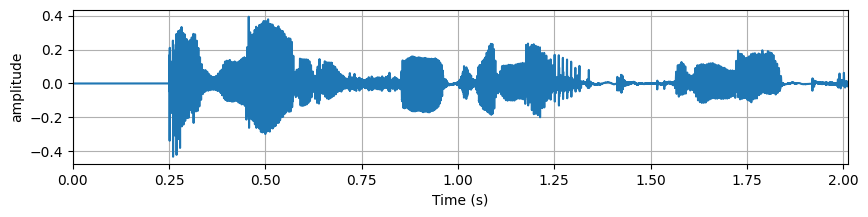

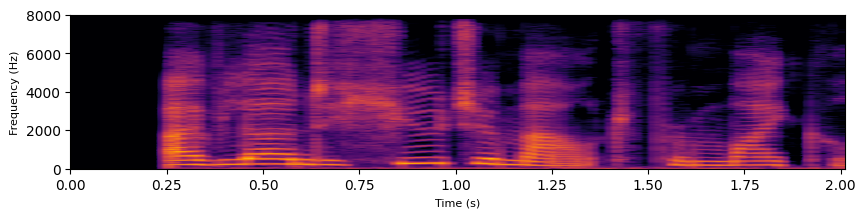

In [4]:
FIGSIZE = (10,2)

index = 0
y, sr = librosa.load(glob(dir_path)[index], sr=None)

display(Audio(y, rate=sr))
audioshow(y, sr=sr, figsize=FIGSIZE)
_ = draw_spec(y, sr=sr, figsize=FIGSIZE, use_colorbar=False)

## TSM

Final SER after 100 iterations: 11.94 dB
(513, 126)


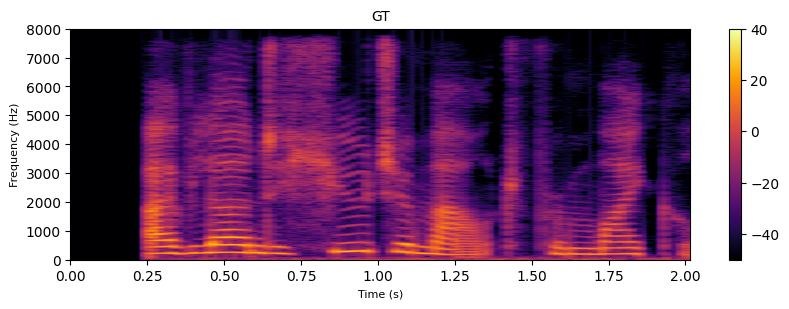

(513, 63)


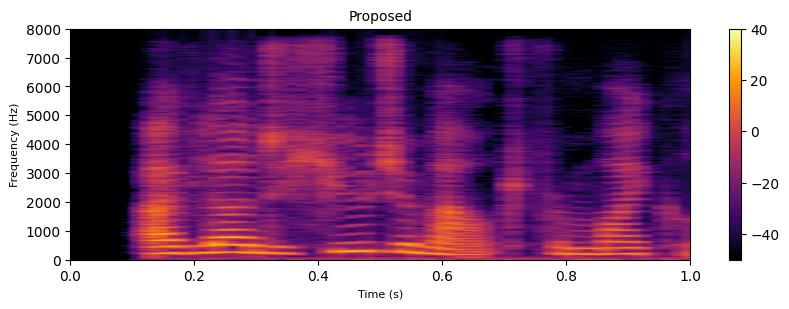

(513, 63)


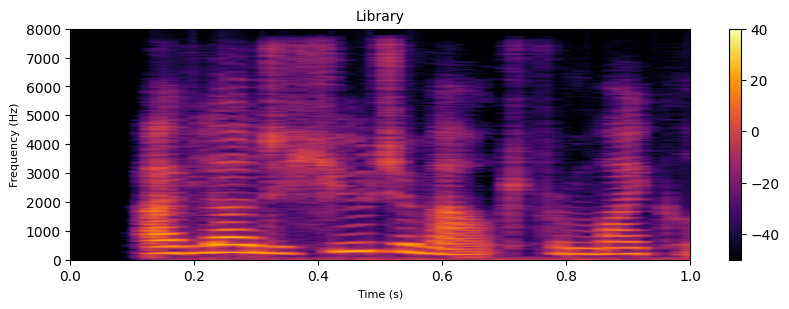

(513, 63)


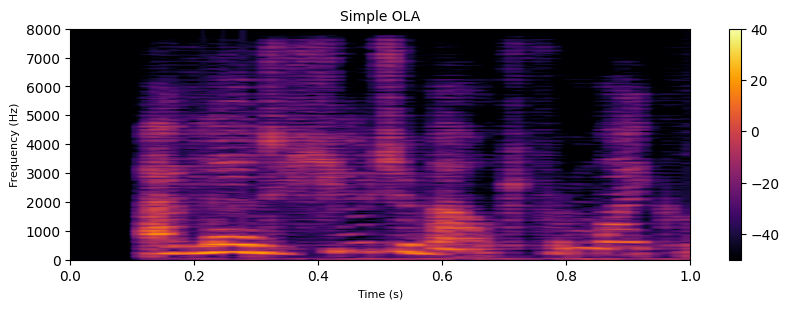

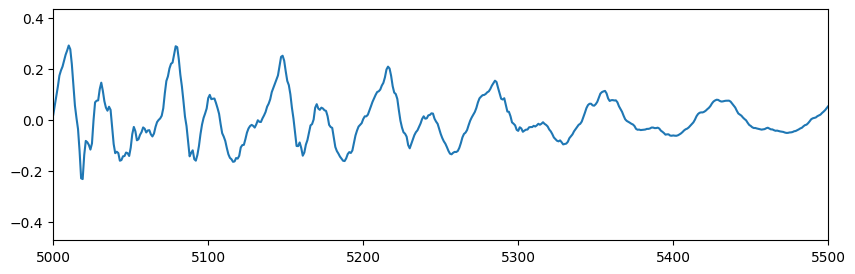

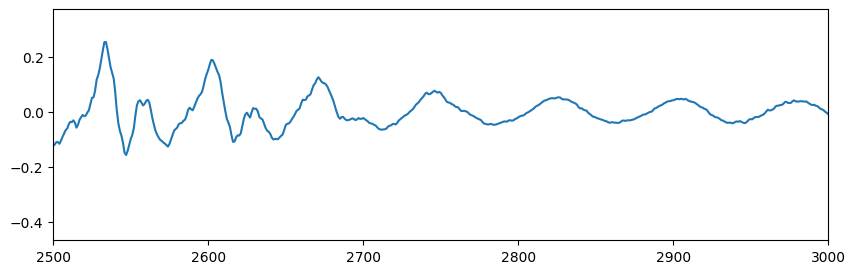

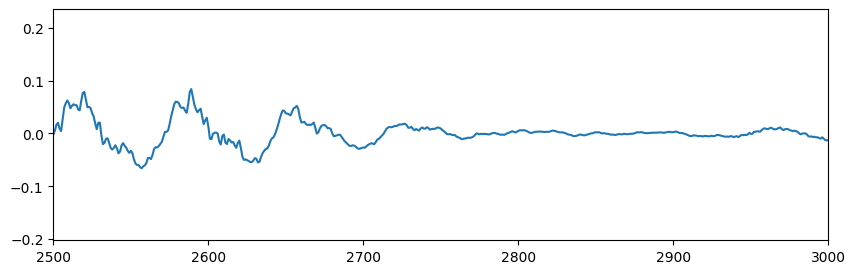

In [13]:
from utils import spec_show
"""
16 khz data
hop_length: 256 (16ms, 75% overlap)
win_length: 1024 (64ms)
"""
RATE= 2
WINLEN = 1024
HOPLEN = 256
NFFT = 1024
FIGSIZE=(10,3)

# proposed
y_tsm = LSEE_TSM(y, rate=RATE, initial='sola', win_length=WINLEN, hop_length=HOPLEN, num_iterations=100, verbose=False)
# library
stftm = np.abs(stft(y, n_fft=NFFT, win_type='hamming', win_length=WINLEN, hop_length=HOPLEN, plot=False))
y_lib = librosa.griffinlim(stftm, n_iter=100, hop_length=int(HOPLEN/RATE), win_length=int(WINLEN), window='hamming')
## simple ola (not in frequency domain)
y_ = ola_tsm(y, win_length=WINLEN, hop_in=HOPLEN, hop_out=int(HOPLEN/RATE))
print(stftm.shape)
spec_show(stftm, sr=sr, figsize=FIGSIZE, title='GT')

## original spectrum w. different scale
# stftm = np.abs(stft(y, n_fft=NFFT, win_type='hamming', win_length=WINLEN, hop_length=int(HOPLEN/RATE), plot=False))
# print(stftm.shape)
# spec_show(stftm, sr=sr, figsize=FIGSIZE, x_extent=2, title='GT (w. hoplen modified)')

## proposed: TSM spectrum
stftm = np.abs(stft(y_tsm, n_fft=NFFT, win_type='hamming', win_length=WINLEN, hop_length=int(HOPLEN), plot=False))
print(stftm.shape)
spec_show(stftm, sr=sr, figsize=FIGSIZE, x_extent=2/RATE, title='Proposed')

## library: TSM spectrum
stftm = np.abs(stft(y_lib, n_fft=NFFT, win_type='hamming', win_length=WINLEN, hop_length=int(HOPLEN), plot=False))
print(stftm.shape)
spec_show(stftm, sr=sr, figsize=FIGSIZE, x_extent=2/RATE, title='Library')

## simple ola: TSM spectrum
stftm = np.abs(stft(y_, n_fft=NFFT, win_type='hamming', win_length=WINLEN, hop_length=int(HOPLEN), plot=False))
print(stftm.shape)
spec_show(stftm, sr=sr, figsize=FIGSIZE, x_extent=2/RATE, title='Simple OLA')

display(Audio(y, rate=sr*RATE))
display(Audio(y_tsm, rate=sr))
display(Audio(y_lib, rate=sr))
display(Audio(y_, rate=sr))

# audioshow(y, sr=sr)
# audioshow(y_tsm, sr=sr)
# audioshow(y_lib, sr=sr)
# audioshow(y_)

plt.figure(figsize=FIGSIZE)
plt.plot(y)
start = 5000
offset = 500
plt.xlim(start,start+offset)
plt.show()
plt.figure(figsize=FIGSIZE)
plt.plot(y_tsm)
plt.xlim(start/RATE,(start+offset)/RATE)
plt.xlim(start/RATE,start/RATE+offset)
plt.show()
plt.figure(figsize=FIGSIZE)
plt.plot(y_)
plt.xlim(start/RATE,(start+offset)/RATE)
plt.xlim(start/RATE,start/RATE+offset)
plt.show()